## Simple SMART 1D Simulator for testing

This App simulates the SMART (Sequential Managed Aquifer Recharge Technology) approach in 1D. It is based on the analytical solution for the steady-state 1D Adv-Disp-React equation after:

Gershon, N. D., and Nir, A. 1969. Effect of boundary conditions of models on tracer distribution in flow through porous mediums. Water Resources Research 5:830-840.


In [93]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

def analyt(v,alpha,x,g,k):
    D=v*alpha
    igr=v*np.sqrt(1+4*k*D/(v**2))
    c=g/k+(1-g/k)*np.exp((v-igr)*x/2/D) #Gershon and Nir 1969
    return c


In [94]:
%%html
<style>
div.jupyter-widgets.widget-label {display: none;}
</style>

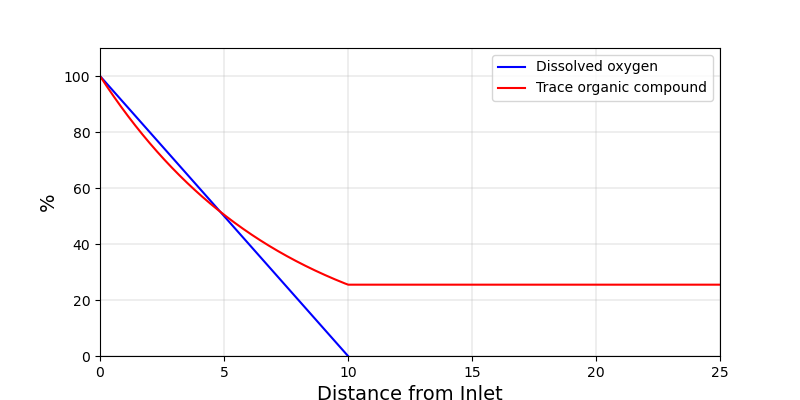

In [91]:
v=1 # pore water velocity
hlf = 5.0
k=np.log(2)/hlf
g=10.0
alpha=0.1
L=25


x=np.arange(0,L+0.01,0.01)
ox=analyt(v,alpha,x,-g/100,1e-12)
TOrg = analyt(v,alpha,x,0,k)
TOrg_Zero=TOrg[ox>=0][-1]
TOrg[ox<0]=TOrg_Zero


fig=plt.figure()
fig.set_size_inches((8,4.0))

ax = plt.subplot(1,1,1)
aa,=ax.plot(x,100*ox,'b-',label='Dissolved oxygen')
bb,=ax.plot(x,100*TOrg,'r-',label='Trace organic compound')

plt.ylim(0,110)
plt.xlim(0,L)
plt.xlabel('Distance from Inlet',fontsize=14)
plt.ylabel('%',fontsize=14)
plt.legend()
plt.grid(linewidth=0.3)

half_l=widgets.FloatLogSlider(
    value=hlf,
    base=10,
    min=-1, # 
    max=4, # 
    step=0.01, # exponent step
    description='Half life of trace organic (day)',
    layout=widgets.Layout(width='100%'),
    style={'description_width': 'initial'},
    continuous_update=False,
    orientation='horizontal'
)

Length = widgets.IntSlider(
    value=L, 
    min=5, max=200, step=1, 
    description='Distance from inlet (m)',
    layout=widgets.Layout(width='100%'),
    style={'description_width': 'initial'},
    continuous_update=False,
    orientation='horizontal'
)

velo=widgets.FloatSlider(
    value=v,
    min=0.1, 
    max=5,  
    step=0.1, # exponent step
    description="Pore water velocity (m/day)",
    layout=widgets.Layout(width='100%'),
    style={'description_width': 'initial'},
    continuous_update=False,
    orientation='horizontal'
)

zero = widgets.FloatSlider(
    value=g, 
    min=0.1, max=100, step=0.1, 
    description='Zero-order rate constant of oxygen (%Sat/day)',
    layout=widgets.Layout(width='100%'),
    style={'description_width': 'initial'},
    continuous_update=False,
    orientation='horizontal'
)


Dispers=widgets.FloatSlider(
    value=alpha,
    min=0.05, 
    max=4.0,  
    step=0.05, # exponent step
    description="Long. Dispers. (m)",
    layout=widgets.Layout(width='100%'),
    style={'description_width': 'initial'},
    continuous_update=False,
    orientation='horizontal'
)


def update(change):
    v = velo.get_interact_value() 
    alpha = Dispers.get_interact_value()
    L = Length.get_interact_value()
    hlf = half_l.get_interact_value()
    g = zero.get_interact_value()
    k=np.log(2)/hlf
    x=np.arange(0,L+0.01,0.01)
    ox=analyt(v,alpha,x,-g/100,1e-12)
    TOrg = analyt(v,alpha,x,0,k)
    TOrg_Zero=TOrg[ox>=0][-1]
    TOrg[ox<0]=TOrg_Zero
    
    aa.set_xdata(x)
    aa.set_ydata(ox*100)
    bb.set_xdata(x)
    bb.set_ydata(TOrg*100)
        
    ax.set_xlim(0,L)
    fig.canvas.draw()

half_l.observe(update, 'value')
Length.observe(update, 'value')
velo.observe(update, 'value')
zero.observe(update, 'value')
Dispers.observe(update, 'value')



vbox1=widgets.VBox(
    [   Length,
        velo,
        Dispers,
        zero, 
        half_l 
        ])

box_layout = widgets.Layout(
        border='solid 1px black',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px')
 

vbox1.layout = box_layout
#vbox2.layout = box_layout
 

vbox1.layout.width = '800px'


widgets.HBox([vbox1])

(by Janek Greskowiak, Mar 2023, A.D.)